# 1. Librairies importation

In [56]:
import math
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

import copy

# 2. Models

In [12]:
class MNIST_MLP(nn.Module):
    def __init__(self, num_inp, num_hid, num_out):
        super(MNIST_MLP, self).__init__()
        self.fc1 = nn.Linear(num_inp, num_hid)
        self.fc2 = nn.Linear(num_hid, num_out)

    def initialize(self):
        nn.init.kaiming_uniform_(self.fc1.weight, a=math.sqrt(5))
        nn.init.kaiming_uniform_(self.fc2.weight, a=math.sqrt(5))
    
    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        x = F.relu(x)

        out = F.softmax(x, dim=1)

        return out

# 3. Functions

In [70]:
def validation(model, data_loader, device):
    model = copy.deepcopy(model)
    model.eval()
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(data_loader):
        #print(i)
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return correct / total

In [78]:
def training(model, train_dataset, test_dataset, optimizer, batch_sizes, target_acc, epoch, loss_fn, device):
    model.train()
    steps = []
    # Train the model for different batch sizes
    for batch_size in batch_sizes:
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
        # Re initialize the model
        model.initialize()
        step = 0
        # Value to know if we must change the batch size
        new_batch = False
        for i in range(epoch):
            if new_batch:
                break
            loss_epoch = 0
            for batch_idx, (data, target) in enumerate(train_loader):
                print(batch_idx)
                optimizer.zero_grad()

                data = data.to(device)
                target = target.to(device)
                output = model(data)

                # Check to know if at step k, the accuracy is greater than the target accuracy
                accuracy = validation(model, test_loader, device)
                #print(accuracy)
                if accuracy >= target_acc:
                    print('Validation accuracy = {:.6f} reached at step {}'.format(accuracy, step))
                    steps.append(step)
                    new_batch = True
                    break

                loss = loss_fn(output, target)

                loss_epoch += loss.item()

                loss.backward()
                optimizer.step()

                step += 1
            
            loss_epoch /= len(train_loader)

            print('Train Epoch: {} \tLoss: {:.6f}'.format(
                i, loss_epoch))

    return steps


# 4. Experimentation

## MNIST

In [79]:
batch_sizes = [1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9]
batch_sizes = [2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9]
target_acc = 0.80
epoch = 40
loss_fn = nn.CrossEntropyLoss()

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)

# Keep only n samples for validation
n = 100
test_dataset, _ = torch.utils.data.random_split(test_dataset, [n, len(test_dataset) - n])

# Initialize the model
model = MNIST_MLP(784, 100, 10).to(DEVICE)
model.initialize()

# Experimentation with non hyper-optimized SGD
# No momentum to focus on the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
steps = training(model, train_dataset, test_dataset, optimizer, batch_sizes, target_acc, epoch, loss_fn, DEVICE)


0
0
1
0.15
1
0
1
0.15
2
0
1
0.15
3
0
1
0.15
4
0
1
0.15
5
0
1
0.15
6
0
1
0.16
7
0
1
0.16
8
0
1
0.16
9
0
1
0.16
10
0
1
0.16
11
0
1
0.16
12
0
1
0.16
13
0
1
0.17
14
0
1
0.17
15
0
1
0.17
16
0
1
0.17
17
0
1
0.18
18
0
1
0.18
19
0
1
0.17
20
0
1
0.17
21
0
1
0.17
22
0
1
0.17
23
0
1
0.16
24
0
1
0.17
25
0
1
0.17
26
0
1
0.19
27
0
1
0.18
28
0
1
0.19
29
0
1
0.18
30
0
1
0.18
31
0
1
0.18
32
0
1
0.18
33
0
1
0.18
34
0
1
0.18
35
0
1
0.18
36
0
1
0.18
37
0
1
0.18
38
0
1
0.18
39
0
1
0.18
40
0
1
0.19
41
0
1
0.19
42
0
1
0.19
43
0
1
0.22
44
0
1
0.22
45
0
1
0.22
46
0
1
0.22
47
0
1
0.22
48
0
1
0.22
49
0
1
0.24
50
0
1
0.24
51
0
1
0.24
52
0
1
0.23
53
0
1
0.24
54
0
1
0.24
55
0
1
0.24
56
0
1
0.24
57
0
1
0.24
58
0
1
0.24
59
0
1
0.24
60
0
1
0.24
61
0
1
0.23
62
0
1
0.24
63
0
1
0.24
64
0
1
0.24
65
0
1
0.24
66
0
1
0.24
67
0
1
0.24
68
0
1
0.24
69
0
1
0.24
70
0
1
0.24
71
0
1
0.24
72
0
1
0.24
73
0
1
0.24
74
0
1
0.24
75
0
1
0.24
76
0
1
0.24
77
0
1
0.24
78
0
1
0.25
79
0
1
0.25
80
0
1
0.24
81
0
1
0.25
82
0
1
0.24
83
0
1
0.25
84

In [80]:
# Size of dataset
print(len(train_dataset))
print(len(test_dataset))

60000
100


In [81]:
print(steps)

[10044, 1236, 7658, 2895, 4444, 2423, 2426]


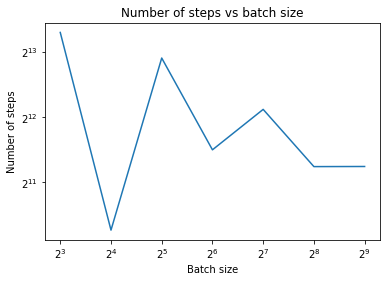

In [87]:
# Plot of the steps vs batch size
# I want to see 2**n on the x axis

plt.plot(batch_sizes, steps)
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlabel('Batch size')
plt.ylabel('Number of steps')
plt.title('Number of steps vs batch size')
plt.show()